<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/fibooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Financial Statement Analysis with Python

In [4]:
# !pip install fibooks

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree


In [7]:
from fibooks import statement_of_cashflows
from fibooks import balance_sheet
from fibooks import income_statement
from fibooks import other

In [9]:
company_c = balance_sheet('company c')
company_c.load_excel('balance_sheet_c.xlsx')

### Load data

In [10]:
company_c.content

,cash,investments,inventories,accounts receivable,pre-paid expenses,other,property and equipment,leasehold improvements,equity and other investments,less accumulated depreciation,accounts payable,accrued wages,accrued compensation,income taxes payable,unearned revenue,total current liabilities,mortgage payable,investment capital,accumulated retained earnings
0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,20.0,15.0,15.0,10.0,15.0,7.5,77.5,10.0,20.0,20.0
1,12.0,12.0,10.0,12.0,12.0,18.0,24.0,24.0,18.0,24.0,18.0,18.0,12.0,18.0,9.0,93.0,8.5,11.0,24.0


### Valuation and basic computations

In [11]:
# Metrics pulled directly from statements

print("current assets for both years", company_c.get_total("current assets"))
print("current ratio for both years", company_c.current_ratio())

current assets for both years [65.0, 76.0]
current ratio for both years [0.43333333333333335, 0.43059490084985835]


In [12]:
# Create a custom financial metric (not included on statements)

company_c.add_custom_category('cash & equivalents', ['cash', 'inventories', 'accounts receivable'])

print("cash & equivalents for both years", company_c.get_total("cash & equivalents"))
print("quick ratio for both years", company_c.custom_ratio('cash & equivalents', 'current liabilities'))

cash & equivalents for both years [30.0, 34.0]
quick ratio for both years [0.2, 0.19263456090651557]


### Combining Financial statements

In [14]:
company_a = income_statement('company a')
company_b = income_statement('company b')

company_a.load_excel('income_statement_a.xlsx')
company_b.load_excel('income_statement_b.xlsx')

In [17]:
# mapping the same variable with a different name on a different statement

company_a.set_mapping({"cost of goods sold": "cogs"})

In [18]:
combined_dataset = other.combine_statements([company_a, company_b])
combined_dataset

revenue  discounts  net revenue  cogs  raw materials  \
company a 0       30         40           50    40             42   
          1       45         42           53    52             54   
          2       64         73           65    35             63   
          3       87         69           74    56             26   
company b 0       54          7            3    76             57   
          1        4         74           76    34             10   
          2       76          5           63    73             76   
          3       87         69           74    56             26   

             fulfillment  transaction fees  total cogs  labor  marketing  \
company a 0           25                23           6     25         54   
          1           36                62           6     64         62   
          2           42                45           5     64         72   
          3           53                26          76     23         73   
company b 0            3                 5          76     15         54   
          1            7                45          65     64         50   
          2           50                34          10     64         52   
          3           53                15          25     40         73   

             sga & other  total opex  depreciation & amortization  \
company a 0           40          52                           43   
          1           34          76                           23   
          2           63          65                           87   
          3           76          76                           63   
company b 0           54          63                           63   
          1           30          76                           17   
          2           63          65                           50   
          3           76          82                           63   

             interest expense  
company a 0                26  
          1                25  
          2                56  
          3                74  
company b 0                26  
          1                50  
          2                56  
          3                74

### Visualization

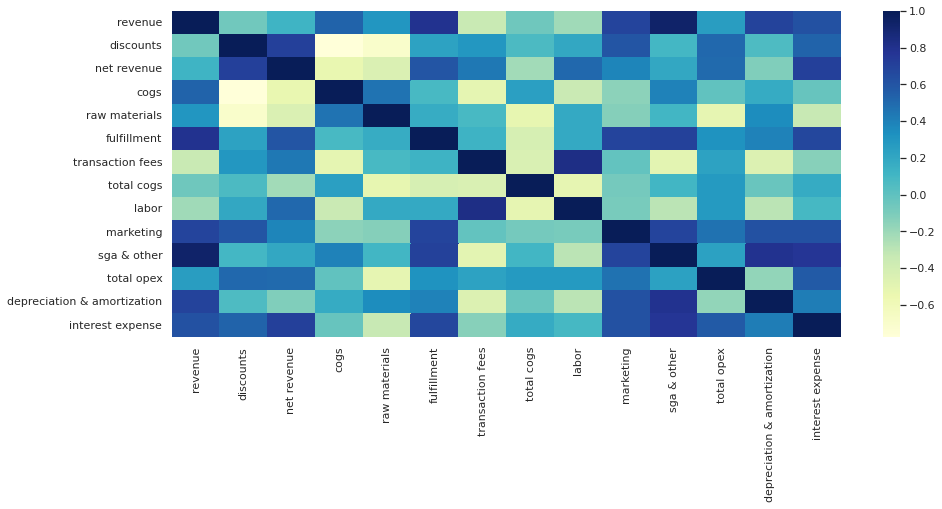

In [19]:
sns.set(rc = {'figure.figsize':(15,6)})
sns.heatmap(combined_dataset.corr(), cmap="YlGnBu")

### Machine Learning

In [29]:
combined_dataset.reset_index(drop=True, inplace=True)

stock_prices = pd.read_csv('https://raw.githubusercontent.com/TimoKats/fibooks/main/demo/data/stock_price.csv', on_bad_lines='skip')
combined_dataset['stock prices'] = stock_prices['price']
X = combined_dataset[['labor', 'marketing', 'raw materials']]
y = combined_dataset[['stock prices']]

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

In [28]:
stock_prices

,price
0,15
1,20
2,10
3,25
4,30
5,15
6,20
7,25


In [37]:
combined_dataset

,revenue,discounts,net revenue,cogs,raw materials,fulfillment,transaction fees,total cogs,labor,marketing,sga & other,total opex,depreciation & amortization,interest expense,stock prices
0,30,40,50,40,42,25,23,6,25,54,40,52,43,26,15
1,45,42,53,52,54,36,62,6,64,62,34,76,23,25,20
2,64,73,65,35,63,42,45,5,64,72,63,65,87,56,10
3,87,69,74,56,26,53,26,76,23,73,76,76,63,74,25
4,54,7,3,76,57,3,5,76,15,54,54,63,63,26,30
5,4,74,76,34,10,7,45,65,64,50,30,76,17,50,15
6,76,5,63,73,76,50,34,10,64,52,63,65,50,56,20
7,87,69,74,56,26,53,15,25,40,73,76,82,63,74,25


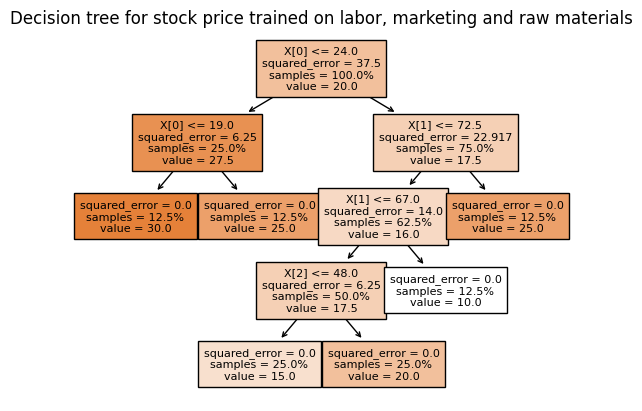

In [36]:
sns.reset_defaults()
tree.plot_tree(clf, filled=True, proportion=True, fontsize=8)
plt.title("Decision tree for stock price trained on labor, marketing and raw materials")
plt.show()

# Income based Valuation

In [32]:
company_d = statement_of_cashflows('company D')
company_d.load_excel('statement_of_cashflows_d.xlsx')

In [33]:
# add capex manually since it isn't in any of the statements

company_d.add_account('capex', 15000)

In [34]:
other.income_based_valuation(company_d, r=0)

46450.0